# Introduction to Linear Programming with Gurobi in Python
Begin by running the following code to get the packages we'll need and get things set up:

In [10]:
from gurobipy import *

# This contains the interface for the LP model we'll be creating.
m = Model()

## Statement of the problem
Leather Limited manufactures two types of belts: the deluxe model and the regular model. Each type requires 1 sq yd of leather. A regular belt requires 1 hour of skilled labor, and a deluxe belt requires 2 hours. Each week, 40 sq yd of leather and 60 hours of skilled labor  are  available.  Each  regular  belt  contributes  \$3  to  profit  and  each  deluxe  belt,  \$4.

---

### Step 1 -- Declaring variables
We begin by telling the model what variables to expect:

In [11]:
# Variable 1: number of regular belts
regular = m.addVar(vtype=GRB.INTEGER)
# Variable 2: number of deluxe belts
deluxe = m.addVar(vtype=GRB.INTEGER)

# Update model to recognize our new variables
m.update()

How would we change this to only accept integer values?

*Hint: the [Gurobi documentation](https://www.gurobi.com/documentation/8.1/refman/) may be helpful*

---
### Step 2 -- Introduce Constraints

In [13]:
# Constraint 1: Leather
m.addConstr(regular + deluxe <= 40)
# Constraint 2: Labor
m.addConstr(regular + 2*deluxe <= 60)
# Constraint 3/4: Non-Negativity
m.addConstr(regular >= 0)
m.addConstr(deluxe >= 0)

<gurobi.Constr *Awaiting Model Update*>

### Step 3 -- Define Objective and Optimize

In [19]:
# Define the objective function
m.setObjective(regular + deluxe, GRB.MAXIMIZE)
# Go!
m.optimize()

Optimize a model with 4 rows, 2 columns and 6 nonzeros
Variable types: 0 continuous, 2 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [4e+01, 6e+01]

Loaded MIP start with objective -0

Presolve removed 4 rows and 2 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.02 seconds
Thread count was 1 (of 4 available processors)

Solution count 2: 40 -0 

Optimal solution found (tolerance 1.00e-04)
Best objective 4.000000000000e+01, best bound 4.000000000000e+01, gap 0.0000%


### Step 4 -- Interpret the Results

In [20]:
# Print out the variables
print("The optimal numbers are x = %d and y = %d." % (regular.x, deluxe.x))
# Print out the optimal income
print("The optimal income is %d dollars." % (3 * regular.x + 4 * deluxe.x))

The optimal numbers are x = 40 and y = 0.
The optimal income is 120 dollars.


### (Optional) Step 5 -- Plot the results
You can only do this with a small number of variables but it is nice to see what happened in solving our LP problem.

<IPython.core.display.Javascript object>


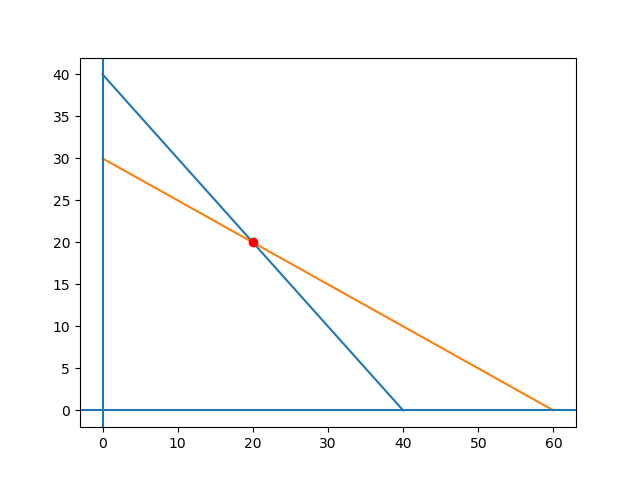

In [9]:
%matplotlib notebook
# Don't forget to import your package!
import matplotlib.pyplot as pp

# Plot Constraints
pp.plot([0,40], [40,0])
pp.plot([0,60], [30,0])
pp.axhline(y=0)
pp.axvline(x=0)

# Plot Solution
pp.plot(x.x, y.x, 'ro')
pp.show()